## 2. Optimization, Learning & Convex functions

Recall from the lecture, what is the "learning" in machine learning?

Machine learning is learning the parameters from the algorithms (i.e. model) in order to well match from your inputs to your outputs (supervised), or find the data patterns (unsupervised).

Here comes the question? How to find the optimized solution of an ML algorithms?

In this part, we start to discuss about different optimization process when facing analytical solutions (closed-form) and numerical solutions.

### 2.1 Optimization

### 2.1.1 Linear Regression

Linear Regression models are used to predict target variables (y's) (i.e. data outputs) in continuous space, which makes them attractive for:

* Understanding relationships between data intpus and data outputs
* Evaluating trends
* Making forecasts
    
Considering the data outputs (Y) can be explained by the data inputs (X=[x0, x1, x2, ...]) as the following with linear relationship:

$$Y=w_0x_0 + w_1x_1 + w_2x_2 + ... +  \epsilon = W^TX + \epsilon$$

| x0 | x1(housesize, $m^2$) | y(price) |
|----|---------------|----------|
| 1  | 2             | 15       |
| 1  | 4             | 32.8     |
| 1  | 5.3           | 36.2     |


The **linear model** is defined as:

$$\widehat{Y}=w_0x_0 + w_1x_1 + w_2x_2 = W^TX $$

Here, the parameters required for learning is $W$. 

The loss function (or objective function) $J$ is:

$$J(W) = \sum_{(W)}({Y-\widehat{Y}})^2 = \sum_{(W)}({Y-W^TX})^2$$

In this case, we're trying to solve the follwoing optimization problems with the mean-squared errors (i.e. minimize the loss function):

$$min \sum_{(W)}({Y-\widehat{Y}})^2 = min \sum_{(W)}({Y-W^TX})^2$$

Minimizing the sum of squared errors (SSE) can be understood as finding the best-fitting straight line through the example points. 

The best-fitting line is called the regression line (or hyperplane when $X \in R^D$, $D > 1$ ), and the vertical offsets from
the regression line to the data points are called the residuals (i.e., the errors of our prediction), as shown in the following:

![](http://rasbt.github.io/mlxtend/user_guide/regressor/LinearRegression_files/simple_regression.png)

we can easily find the analytical solutions (i.e. closed-form solution) via

$$W = (X^TX)^{-1}X^TY$$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

### Exercise 2.1.1 Find the analytical solution of Linear Regression Model
Having a linear regression model $y = (-8) + 3 x_1$

Assume that the data input $x_1$ is generated from **np.linspace(0,10,100)**

And the data outputs are generated via $y = (-8) + 3 x_1 + \epsilon$

1. Create random numpy arrays $x_0$, $x_1$ and noise $\epsilon$
2. Generate data outputs via $y = (-8) + 3 x_1 + \epsilon$
3. Plot the scatter plot to see the data distribution
4. Find the analytical solution of LR model via the upper formula
5. Plot your results

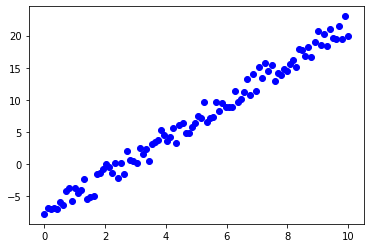

In [27]:
## Create a scenario with the inputs and outputs with linear relationship
# 1. Create random numpy arrays x0, x1 and noise factor delta
np.random.seed(0)
x1 = np.linspace(0,10,100)
x0 = np.ones(100)
delta = np.random.uniform(-2,2, size=(100,))

# 2. Generate data outputs via $y = (-8) + 3 x_1 + \epsilon$
y = (-8)*x0 + 3 * x1+ delta
#W = np.array([3, 0.4])
#X = np.array([x0,x])
#print(X)
#y11 = W.dot(X) + delta
#print(y, y11)

# 3. Plot the scatter plot to see the data distribution
plt.scatter(x1, y, color = 'blue')
plt.show()

In [3]:
# 4. Find the analytical solution of LR model
class LinearRegression:
    def fit(self, X, y):
        self.w = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T,X)),X.T),y)
        #self.w = np.linalg.lstsq(X, y, rcond=None)[0]
    def predict(self, X):
        return X.dot(self.w)

In [4]:
np.random.seed(0)
#x1 = np.arange(100)
x1 = np.linspace(0,10,100)
x0 = np.ones(100)
delta = np.random.uniform(-2,2, size=(100,1))
#delta = np.random.uniform(-10,10, size=(500,))
#Y = 50*x0 + 0.4 * x1+ delta
W = np.array([-8,3]).reshape(2,1) # (2,1)
X = np.array([x0,x1]).T # (500,2)
Y = np.dot(X,W)+delta # (500,1)

#print(W.shape, X.shape, Y.shape)
model = LinearRegression()
model.fit(X,Y)
print('Parameters:',model.w)

Parameters: [[-7.60858727]
 [ 2.89995253]]


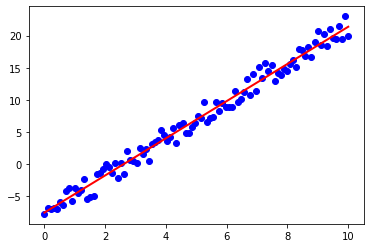

In [5]:
# 5. Plot the results
#w0 = plt.scatter(366 * X_train, y_train, color=cmap(0.9), s=10)
#w1 = plt.scatter(366 * X_test, y_test, color=cmap(0.5), s=10)
Y_pred = model.predict(X)

plt.scatter(X[:,1:], Y, color = 'blue')
plt.plot(X[:,1:], Y_pred, color='red', linewidth=2)
#plt.suptitle("Linear Regression")
#plt.title("MSE: %.2f" % mse, fontsize=10)
#plt.legend((m1, m2), ("Training data", "Test data"), loc='lower right')
plt.show()

In [6]:
# Analytical Solutions
def linear_regression(x,y):
    x=np.concatenate((np.ones((x.shape[0],1)),x[:,np.newaxis]),axis=1)
    #print(x.shape)
    y=y[:,np.newaxis]
    #print(y.shape)
    weights=np.matmul(np.matmul(np.linalg.inv(np.matmul(x.T,x)),x.T),y)
    return weights

In [7]:
np.random.seed(0)
x1 = np.linspace(0,10,100)
x0 = np.ones(100)
delta = np.random.uniform(-2,2, size=(100,))

y = (-8)*x0 + 3 * x1+ delta
linear_regression(x1,y)

array([[-7.60858727],
       [ 2.89995253]])

### 2.2.1 Logistic Regression

What's the problem here with linear regression model to fit the classification problem?

![](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1534281070/linear_vs_logistic_regression_edxw03.png)

A solution for classification is logistic regression. 

Instead of fitting a straight line or hyperplane, the logistic regression model uses the logistic function to squeeze the output of a linear equation between 0 and 1.

Using the Sigmoid function (also called logistic function), the standard linear formula is transformed to the logistic regression formula. Here z can be any real values where the output of sigmoid function will be the value between 0 and 1 (considered as the predicted probability).

$$\sigma(z) = \frac{1}{1+ exp(-z)}$$

And for classification, we can set a threshold as 0.5, if the output of the sigmoid function is more than 0.5, we can classify the outcome as 1 or YES, and if it is less than 0.5, we can classify it as 0 or NO.

In [8]:
## Write a logistic function, with the above formulas
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))
#logistic(np.array([0.458,0.458]))

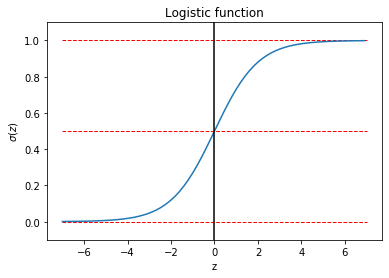

In [9]:
# Plot the logistic function
z = np.arange(-7,7,0.1)
sigma = logistic(z)
plt.plot(z,sigma)
plt.axvline(0.0, color = 'k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\sigma(z)$')
plt.title('Logistic function')
plt.hlines(y=1.0, xmin = -7, xmax = 7, color = 'red', linewidth = 1, linestyle = '--')
plt.hlines(y=0.5, xmin = -7, xmax = 7, color = 'red', linewidth = 1, linestyle = '--')
plt.hlines(y=0.0, xmin = -7, xmax = 7, color = 'red', linewidth = 1, linestyle = '--')
plt.show()

### Exercise 2.2.1 What you discover from the logistic function plot?


For considering $z = W^TX$, where the input as a linear regression function, the **logistic regression model** is defined as:

$$\widehat{Y} = \sigma(W^TX) = \frac{1}{1+ exp(- W^TX)}$$

We're trying to learn the weight $W$ of the logistic regression model. But how we learn it?

* Require to define the objective function
* Require to select a method for minimizing (or maximizing) the objective function (analytical? numerical?)

### Define the objective function

Here we use the **cross-entropy loss** between the predicted output $\widehat{Y}$ and the true output $Y$:

$$CE(Y, \widehat{Y}) = -[\widehat{Y}ln(Y) + (1-\widehat{Y})ln(1-Y)]$$

In this case, if your predicted output is the same as the true output (e.g.1 or 0 in both cases), the cross-entropy loss will be 0.

Here the optimized problems to learn the parameter $W$ is to minimize the cross-entropy loss

$$\min CE(Y, \widehat{Y}) = -[\widehat{Y}ln(Y) + (1-\widehat{Y})ln(1-Y)]$$

<mark>But how? Can we find an analytical solution?</mark>

### Numerical Optimization

Most problems in machine learning require minimization / maximization of the loss / objective functions to learn the optimized parameters.

Let x* be the value of x which minimized the value of the function f(x). Mathematically, this is written as:
$$x^* = \operatorname*{argmin}_x f(x)$$

In few cases, we can solve this minimization problem analytically in closed form (i.e. solving for optimal $x^*$ in $\triangledown_xf(x^*)=0$).

But in most cases it is too cumbersome (or impossible) to solve these equations analytically. So, it must be tackled numerically.

The most common ways to solve the problems with no closed-form solution is with **iterative algorithm**. 
These iterative algorithms construct a sequence of points for the parameter x as $x^{(0)}, x^{(1)} ...$ at each time step such that hopefully after a certain iteration steps $x^t = x^{*}$.

Such a sequence is called the minimizing sequence for the problem.

And **Gradient Descent** is one of the most common methods for **iterative algorithm**.


### Convex Function
And important property of a function f(x) is whether it is a **convex function** or a **non-convex function**.

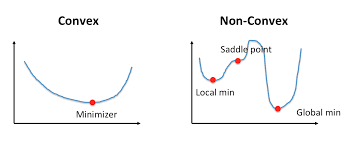

**Convex function** is useful since you can guarantee that the minimizing sequence converges to the true global minimum of the function, while

**non-convex function** can only guarantee that it will reach a local minimum.

<mark>Imaging dropping a ball from both side, will the results be different concerning the convex function and non-convex function? </mark>

<mark>And if we initialize the value from the right side instead of the left side, what will happen?</mark>

Gradient Descent can only possibly find the local minimum for a non-convex function, but can not guaranteed a global minimum.

### Gradient Descent

Gradient descent method is an iterative optimization algorithm to find the minimum of a function. The intuition is as follows:

Suppose you want to find the optimized value $x^*$ which minimizes the function f(x)
1. Start at a given point $x_0$ and compute the gradient at the point $\triangledown_{x_0}f(x)$
2. Take a step of length $\eta$ on the direction of the negative gradient to find a new point: $x_1 = x_0 - \eta \triangledown_{x_0}f(x)$
3. Then you compute the gradient at the new point $\triangledown_{x_1}f(x)=0$, and take a step of length $\eta$ on the direction of the negative gradient to find a new point: $x_2 = x_1 - \eta \triangledown_{x_1}f(x)$

Proceed the iterative steps, until a minimum (local/global) has reached. The minimum can be identified if the norm of the gradient is zero: $||\triangledown f(x)=0||$

Here the step length $\eta$ we often called **learning rate**, the iteration step we often called **epoch**.

<mark>What are the problems for the simple gradient descent?</mark>

#### Problem1: Define the learning rate $\eta$

![](https://www.jeremyjordan.me/content/images/2018/02/Screen-Shot-2018-02-24-at-11.47.09-AM.png)

The left figure shows what could happen if we choose a too small learning rate: although the cost decreases, the descent is too small that the algorithm would require a large number of epochs to converge.

The right figure shows what could happen if we choose a too large learning rate: instead of minimizing the cost function, the error becomes larger in every epoch because we overshoot the optimal point every time.

So we need to choose a proper learning rate, can either do hyperparameter tuning or with other approach like SGD (which adjust the learning rate, not the fixed one as simple GD)

#### Problem2: Descent Direction
Using the negative gradient as direction can lead to a very slow convergence. Different methods that change the descent direction by multiplying the gradient by a matric B have been proposed that guarantee a faster convergence (e.g. Conjugate Gradient (CG))

#### Problem3: Stopping Criteria
It's normally not possible to reach full convergence due to the efficiency, or because of numerical issues (computers cannot perform exact arithmetic). Normallly we need to define a stopping criteria for the algorithm by:
* Define a maximum number of iterations (i.e. epochs)
* If the gradient norm be smaller than a given threshold $||\triangledown f(x)|| \leq \theta$, or the normalized difference in the function value be smaller than a given threshold $\frac{|f(x_t)-f(x_{t-1})|}{\max(|f(x_t)|,|f(x_{t-1})|)} \leq \lambda$

### Exercise 2.2.2 Find the numerical solution of Logistic Regression Model via Gradient Descent

1. Given the data related to the candidates who would get admitted to a prestigious university, there are 2 possible outcomes: admitted (with the value 1), and rejected (with the value 0)
2. Build a logistic regression model
    * Load the data into input data X and output data Y
    * Define the logistic function
    * Define the cross-entropy loss
    * Define the gradient descent algorithm
    * Define the learning rate and iteration steps
    * Train your model, check the loss results
3. Adjust the learning rate and epochs, any observation?

In [10]:
import pandas as pd
candidates = {'gmat': [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,590,690],
              'gpa': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
              'work_experience': [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],
              'admitted': [1,1,1,1,1,1,0,1,1,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1]
              }

df = pd.DataFrame(candidates,columns= ['gmat', 'gpa','work_experience','admitted'])
df.head(5)

,gmat,gpa,work_experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,1
3,710,3.7,5,1
4,680,3.9,4,1


In [11]:
from sklearn.model_selection import train_test_split
X = np.array(df[['gmat', 'gpa','work_experience']])
y = np.array(df['admitted'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [12]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            if(self.verbose == True and i % 10000 == 0):
                z = np.dot(X, self.theta)
                h = self.__sigmoid(z)
                print(f'loss: {self.__loss(h, y)} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X, threshold):
        return self.predict_prob(X) >= threshold

In [14]:
import sklearn
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) * 1
model = LogisticRegression(lr=0.0001, num_iter=300000)
model.fit(X, y)
model.theta

array([-0.39261103,  1.76397463, -2.84390235])

In [15]:
# You can also simiply use the scikit learn model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1e20)
model.fit(X, y)
model.coef_

/home/chung/miniconda3/envs/tflow/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[ 31.5951929 , -28.30153825]])

### Exercise 2.2.3 Find the numerical solution of Linear Regression Model
Need to modify the objective function above from logisitic regression

### Exercise 2.2.4 For initialize different starting point of x, the result will be different for the gradient descent methods

Consider the function $f(x)= (x+2)^2-16exp(-(x-2)^2)$.

1. Make a function get_y(x) that computes the function value given x
2. Draw a plot around $x\in [-8,8]$
3. Calculate the derivative of the function f(x), implement the function get_grad(x)
4. Write the gradient descent function gradient_descent()
5. Two scenarios: what are the results if x_0 = -8, and how about x_0 = 8?
6. How about changing the learning rate (lr), iteration steps(max_iter), and precision(prec)?

In [16]:
#1. Make a function that computes the function value given x
def get_y(x):
    return (x+2)**2-16*np.exp(-((x-2)**2))

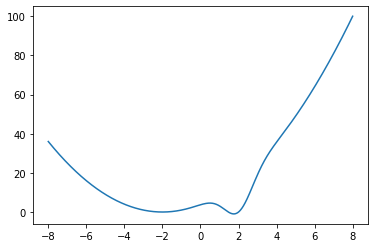

In [17]:
#2. Draw a plot around x in [-8,8]
x = np.arange(-8, 8, 0.001)
y = np.array([get_y(u) for u in x])
plt.plot(x,y)
plt.show()

In [18]:
#3. Calculate the derivative of the function f(x), implement the function get_grad(x)
def get_grad(x):
    return (2*x+4)-16*(-2*x+4)*np.exp(-((x-2)**2))

In [19]:
#4. Write the gradient descent function gradient_descent()
def gradient_descent(start_x, func, grad, prec=0.0001, lr = 0.1, max_iter = 100):
    prec = prec
    lr = lr
    max_iter = max_iter
    x_new = start_x
    res = []
    for i in range(max_iter):
        x_old = x_new
        x_new = x_old - lr * grad(x_new)
        f_x_new = func(x_new)
        f_x_old = func(x_old)
        res.append([x_new, f_x_new])
        if (abs(f_x_new - f_x_old)<prec):
            print("Change in function values too small, leaving")
            print('Converging point:', x_new)
            print('Minimized value:', f_x_new)
            return np.array(res)
    print('Exceeded maximum number of iterations, leaving')
    print('Converging point:', x_new)
    print('Minimized value:', f_x_new)
    return(np.array(res))

Change in function values too small, leaving
Converging point: -2.011600506267682
Minimized value: 0.00013293098384661487


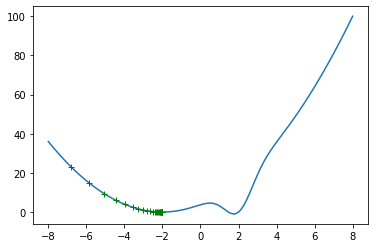

In [20]:
#5.1 What's the result if x_0 = -8?
x_0 = -8
res = gradient_descent(x_0, get_y, get_grad)
plt.plot(x,y)
plt.plot(res[:,0], res[:,1], 'g+',)
plt.show()

Change in function values too small, leaving
Converging point: 1.7530830082928162
Minimized value: -0.9680214665375022


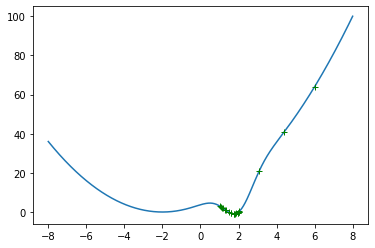

In [21]:
#5.2 What's the result if x_0 = 8?
x_0 = 8
res = gradient_descent(x_0, get_y, get_grad)
plt.plot(x,y)
plt.plot(res[:,0], res[:,1], 'g+')
plt.show()

Now that the algorithm converged to the global minimum. However, note that getting to the global minimum, the sequence of points jumped from one side of the minimum to the other.

In [22]:
res

array([[ 6.        , 63.9999982 ],
       [ 4.39999856, 40.90956343],
       [ 3.09579816, 21.15177811],
       [ 1.02130145,  2.9887958 ],
       [ 1.61877858, -0.7402349 ],
       [ 1.94992301, -0.35803519],
       [ 1.31978342,  0.94760383],
       [ 2.02623978,  0.22161937],
       [ 1.13708233,  2.2427023 ],
       [ 1.82105621, -0.89531119],
       [ 1.61141974, -0.71528469],
       [ 1.95832504, -0.30389818],
       [ 1.29978849,  1.08948428],
       [ 2.01212209,  0.09947458],
       [ 1.17091269,  2.00846292],
       [ 1.87093466, -0.75154668],
       [ 1.50293396, -0.22677184],
       [ 2.04474566,  0.39197016],
       [ 1.09289682,  2.53906224],
       [ 1.74915092, -0.96808581],
       [ 1.75308301, -0.96802147]])

Exceeded maximum number of iterations, leaving
Converging point: 6.185668025073309
Minimized value: 67.00516062283093


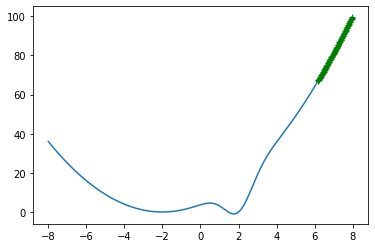

In [23]:
#6. How about changing the learning rate (lr), iteration steps(max_iter), and precision(prec)?
# Default value:  prec=0.0001, lr = 0.1, max_iter = 100
# If lr smaller, lr = 0.001, max_iter unchanged
x_0 = 8
res = gradient_descent(x_0, get_y, get_grad, prec=0.0001, lr = 0.001, max_iter = 100)
plt.plot(x,y)
plt.plot(res[:,0], res[:,1], 'g+')
plt.show()

Change in function values too small, leaving
Converging point: 1.7612901488879322
Minimized value: -0.9664676312988725


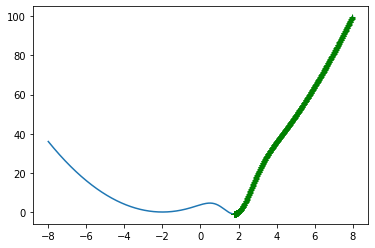

In [24]:
# If lr smaller, lr = 0.001, max_iter increase
x_0 = 8
res = gradient_descent(x_0, get_y, get_grad, prec=0.0001, lr = 0.001, max_iter = 1000)
plt.plot(x,y)
plt.plot(res[:,0], res[:,1], 'g+')
plt.show()

Exceeded maximum number of iterations, leaving
Converging point: 1.906115691409945
Minimized value: -0.6018516987516911


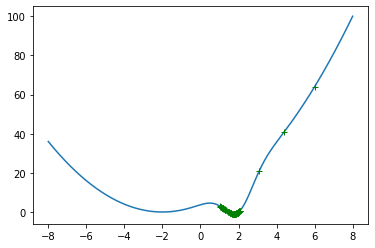

In [25]:
# If prec smaller, seems like will never reach to the convergence if max_iter unchanged
x_0 = 8
res = gradient_descent(x_0, get_y, get_grad, prec=0.00001, lr = 0.1, max_iter = 100)
plt.plot(x,y)
plt.plot(res[:,0], res[:,1], 'g+')
plt.show()

In [ ]:
plt("")

In [ ]:
x = np.arange(500)
x0 = np.ones(500)
delta = np.random.uniform(-10,10, size=(500,))

y = 3 + .4 * x+ delta
learning_rate=0.0001
#經過3000次的調整參數
n_iterations=100

#隨機定義參數值
theta = np.random.randn(2,1)
#如同最小平方法,必須加入截距項
x=np.concatenate((np.ones((x.shape[0],1)),x[:,np.newaxis]),axis=1)
y=y[:,np.newaxis]
#來畫點不一樣風格的圖吧
plt.style.use('fivethirtyeight')
print(x.shape, y.shape)
#開始梯度下降
for iteration in range(n_iterations):
    #求出預測的yhat值
    scores = np.dot(x,theta)
    #誤差值
    output_error = y-scores
    #x的shape(50,2) output_error的shapeｊ為(50,1) gradients為(2,1)
    gradients = 2*np.dot(x.T,output_error)
    #每次對theta
    theta += learning_rate*gradients

In [65]:
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

In [66]:
def cross_entroy_loss(X, Y, W):
    '''
    Using Mean Absolute Error

    Features X:(100,3)
    Labels Y: (100,1)
    Weights W:(3,1)
    predictions XW: (100,1)
    Returns 1D matrix of predictions
    Cost = (labels*log(predictions) + (1-labels)*log(1-predictions) ) / len(labels)
    '''
    observations = len(Y)

    predictions = logistic(np.dot(X,W))

    #Take the error when label=1
    class1_cost = -Y*np.log(predictions)

    #Take the error when label=0
    class2_cost = (1-Y)*np.log(1-predictions)

    #Take the sum of both costs
    cost = class1_cost + class2_cost

    #Take the average cost
    cost = cost.sum() / observations

    return cost

In [67]:
def update_weights(X, Y, W, lr):
    '''
    Vectorized Gradient Descent

    Features:(200, 3)
    Labels: (200, 1)
    Weights:(3, 1)
    '''
    N = len(X)

    #1 - Get Predictions
    predictions = logistic(np.dot(X,W))

    #2 Transpose features from (200, 3) to (3, 200)
    # So we can multiply w the (200,1)  cost matrix.
    # Returns a (3,1) matrix holding 3 partial derivatives --
    # one for each feature -- representing the aggregate
    # slope of the cost function across all observations
    gradient = np.dot(X.T,  predictions - Y)

    #3 Take the average cost derivative for each feature
    gradient /= N

    #4 - Multiply the gradient by our learning rate
    gradient *= lr

    #5 - Subtract from our weights to minimize cost
    W = W - gradient

    return W

In [68]:
def logistic_regression(X, Y, W, lr, iters):
    cost_history = []

    for i in range(iters):
        weights = update_weights(X, Y, W, lr)

        #Calculate error for auditing purposes
        cost = cross_entroy_loss(X, Y, W)
        cost_history.append(cost)

        # Log Progress
        if i % 1000 == 0:
            print("iter: "+str(i) + " cost: "+str(cost))

    return weights, cost_history

In [59]:
from sklearn.linear_model import LogisticRegression
candidates = {'gmat': [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,590,690],
              'gpa': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
              'work_experience': [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],
              'admitted': [1,1,1,1,1,1,0,1,1,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1]
              }

df = pd.DataFrame(candidates,columns= ['gmat', 'gpa','work_experience','admitted'])


X = df[['gmat', 'gpa','work_experience']]
y = df['admitted']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)  #in this case, you may choose to set the test_size=0. You should get the same prediction here

logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
logistic_regression.coef_

/home/chung/miniconda3/envs/tflow/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[-0.00925059,  1.18643654,  1.0850531 ]])

In [ ]:
weights=np.zeros((X.shape[1],1))
logistic_regression(X_train,y_train,weights, 0.0001, 100 )

In [70]:
def logistic_regression(X,Y,num_steps,learning_rate,add_intercept=False):
    make_plot=[]
    #代表如果是否需要截距項 True的話就會建立之
    if add_intercept:
        intercept=np.ones((X.shape[0],1))
        X=np.hstack((intercept,X))
    
    weights=np.zeros(X.shape[1])
    #開始進行迴圈跑最出最佳參數
    for step in range(num_steps):
        scores=np.dot(X,W)
        #function套入sigmoid function得1機率值
        predictions=logistic(scores)
        #觀看誤差
        output_error_singal=Y-predictions
        #gradient
        gradient=np.dot(X.T,output_error_singal)
        weights+=learning_rate*gradient
        
        #print出藉由參數不斷的調整 Loss function不斷在向最小化邁進
        if step%10000==0:
            make_plot.append(cross_entroy_loss(X,Y,W))
    return weights,make_plot

In [73]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

np.random.seed(12)
number_observation=5000
#建立多元常態分佈矩陣, 而第二個list則為協方差矩陣,描述x1,x2變數間的相關關係
x1=np.random.multivariate_normal([0,0],[[1,0.75],[0.75,1]],number_observation)
x2=np.random.multivariate_normal([1,4],[[1,0.75],[0.75,1]],number_observation)
#將其兩個從原本的shape都為(5000,2) 轉變成(10000,2) 疊加的概念
simulated_separableish_features=np.vstack((x1,x2)).astype(np.float32)

#為了設置color的label
simulated_labels=np.hstack((np.zeros(number_observation),np.ones(number_observation)))
print(simulated_separableish_features.shape)

def logistic_regression(features,target,num_steps,learning_rate,add_intercept=False):
    make_plot=[]
    #代表如果是否需要截距項 True的話就會建立之
    if add_intercept:
        intercept=np.ones((features.shape[0],1))
        features=np.hstack((intercept,features))
    
    weights=np.zeros(features.shape[1])
    #開始進行迴圈跑最出最佳參數
    for step in range(num_steps):
        scores=np.dot(features,weights)
        #function套入sigmoid function得1機率值
        predictions=logistic(scores)
        #觀看誤差
        output_error_singal=target-predictions
        #gradient
        gradient=np.dot(features.T,output_error_singal)
        weights+=learning_rate*gradient
        
        #print出藉由參數不斷的調整 Loss function不斷在向最小化邁進
        if step%10000==0:
            make_plot.append(cross_entroy_loss(features,target,weights))
    return weights,make_plot

weights=logistic_regression(simulated_separableish_features,simulated_labels,num_steps=100,learning_rate=1e-5,add_intercept=True)

(10000, 2)


In [74]:
weights

(array([-1.27121515, -0.23666288,  1.09528394]), [-0.09562371370535308])

In [80]:
# Numerical Solutions with Gradient Descent
class LogisticRegression:
    def fit(self, X, y, n_iter=4000, lr=0.01):
        self.w = np.random.rand(X.shape[1],1)
        for _ in range(n_iter):
            self.w -= lr * np.dot(X.T,self.predict(X) - y)
    def predict(self, X):
        return logistic(X.dot(self.w))

In [82]:
a = LogisticRegression()
a.fit(X_train,y_train)
a.w

array([[ 93.01936466],
       [200.36146761],
       [658.76634932]])

### Adjusting Learning rate

In [ ]:
LogisticRegression.fit(

In [134]:
# Building the model
x = np.arange(500)
x0 = np.ones(500)
delta = np.random.uniform(-10,10, size=(500,))

y = 3 + .4 * x+ delta
W = np.array([3, 0.4])
X = np.array([x0,x]).T # (500,2)
Y = y.reshape(len(y),1)
#print(X.shape, Y.shape)
#X = X.T
m = np.random.randn(2,1)
#m = np.array([[1],[1]]) # (2,1)
c = 0

L = 0.0001  # The learning Rate
epochs = 100  # The number of iterations to perform gradient descent

n = float(X.shape[0]) # Number of elements in X
# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = np.dot(X,m)  # The current predicted value of Y
    D_m = (-2/n)*np.dot(X.T, (Y - Y_pred))
    #print(Y_pred.shape)
    #D_m = (-2/n) * sum(X * (y - Y_pred))  # Derivative wrt m
    #D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    #print(m.shape)
    #c = c - L * D_c  # Update c
    
print (m)

[[-8.02274764e+116]
 [-2.67156690e+119]]


In [105]:
learning_rate=0.0001
#經過3000次的調整參數
n_iterations=3000
rng=np.random.RandomState(1)
#numpy.random.randn(d0, d1, …, dn)是從常態分配中返回一個或多個值 
x=10*rng.rand(50)
#numpy.random.rand(d0, d1, …, dn)的數值會產生在(0,1)之間
y=2*x-5+rng.randn(50)
#隨機定義參數值
theta = np.random.randn(2,1)
#如同最小平方法,必須加入截距項
x=np.concatenate((np.ones((x.shape[0],1)),x[:,np.newaxis]),axis=1)
y=y[:,np.newaxis]
#來畫點不一樣風格的圖吧
#plt.style.use('fivethirtyeight')
#開始梯度下降
for iteration in range(n_iterations):
    #求出預測的yhat值
    scores = np.dot(x,theta)
    #誤差值
    output_error = y-scores
    #x的shape(50,2) output_error的shapeｊ為(50,1) gradients為(2,1)
    gradients = 2*np.dot(x.T,output_error)
    #每次對theta
    theta += learning_rate*gradients

In [61]:
D_m = (-2/n)*np.dot(X.T,(y - m*X))
m - L * D_m

array([[3.97627008e-04, 7.70378733e-04, 5.85526752e-04, ...,
        1.99834271e-02, 1.97168269e-02, 2.02717328e-02],
       [7.95254016e-04, 1.54075747e-03, 1.17105350e-03, ...,
        3.99668541e-02, 3.94336539e-02, 4.05434655e-02],
       [1.19288102e-03, 2.31113620e-03, 1.75658026e-03, ...,
        5.99502812e-02, 5.91504808e-02, 6.08151983e-02],
       ...,
       [1.98018250e-01, 3.83648609e-01, 2.91592323e-01, ...,
        9.95174668e+00, 9.81897981e+00, 1.00953229e+01],
       [1.98415877e-01, 3.84418988e-01, 2.92177849e-01, ...,
        9.97173011e+00, 9.83869664e+00, 1.01155947e+01],
       [1.98813504e-01, 3.85189366e-01, 2.92763376e-01, ...,
        9.99171354e+00, 9.85841347e+00, 1.01358664e+01]])

In [ ]:
# Numerical Solutions
class LinearRegression:
    def fit(self, X, y, n_iter=1000, lr=0.0001):
        self.w = np.random.rand(X.shape[1])
        for _ in range(n_iter):
            self.w -= lr * (self.predict(X) - y).dot(X)
    def predict(self, X):
        return sigmoid(X.dot(self.w))

In [152]:
class LinearRegression:
    def fit(self, X, y):
        self.w = np.linalg.lstsq(X, y, rcond=None)[0]
    def predict(self, X):
        return X.dot(self.w)

In [162]:
np.random.seed(0)
x = np.arange(500)
x0 = np.ones(500)
delta = np.random.uniform(-10,10, size=(500,))

y = 3 + .4 * x+ delta
W = np.array([3, 0.4])
X = np.array([x0,x]).T # (500,2)
Y = y.reshape(len(y),1)
model = LinearRegression()

In [163]:
model.fit(X, Y)

In [164]:
model.w

array([[2.94565903],
       [0.39994507]])

In [27]:
x = np.array([[1,2],[3,4]]) 
y = np.linalg.inv(x)
#print(np.linalg.inv(np.dot(X.T,X)))

In [25]:
np.dot(X.T,X)

array([[1.000e+00, 1.000e+00, 1.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [1.000e+00, 2.000e+00, 3.000e+00, ..., 9.800e+01, 9.900e+01,
        1.000e+02],
       [1.000e+00, 3.000e+00, 5.000e+00, ..., 1.950e+02, 1.970e+02,
        1.990e+02],
       ...,
       [1.000e+00, 9.800e+01, 1.950e+02, ..., 9.410e+03, 9.507e+03,
        9.604e+03],
       [1.000e+00, 9.900e+01, 1.970e+02, ..., 9.507e+03, 9.605e+03,
        9.703e+03],
       [1.000e+00, 1.000e+02, 1.990e+02, ..., 9.604e+03, 9.703e+03,
        9.802e+03]])